# Exemplos sobre a autocorrelação

A autocorrelação é definida por

\begin{equation}
R_{xx}(\tau)=\int_{-\infty}^{\infty}x(t)x(t+\tau)\mathrm{d} t
\tag{1}
\end{equation}

Veremos uma intuição sobre ela e dois exemplos práticos,

# Intuição

Vamos avaliar o que acontece com um ruído branco. Particularmente, estamos interessados no produto $x(t)x(t+\tau)$ para diferentes valores de $\tau$. Vamos tomar uma porção deste sinal aleatório para investigar o que acontece com o produto $x(t)x(t+\tau)$, à medida que aplicamos diferentes atrasos $\tau$. 

- Note que para $\tau = 0$, $x(t)$ e $x(t+\tau)$ estarão perfeitamente alinhados no tempo e o produto será máximo

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy.stats import norm
from scipy import signal
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd

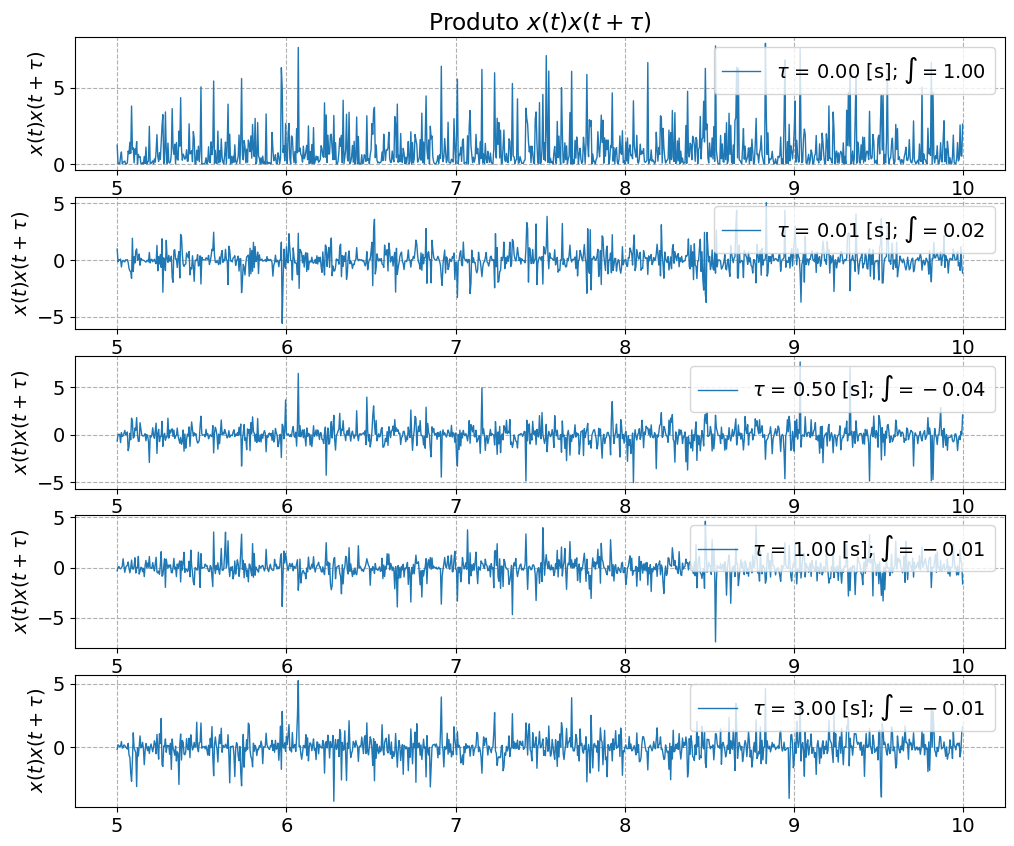

In [2]:
# Frequencia de amostragem e vetor temporal
fs = 200
time = np.arange(0, 20, 1/fs)

# sinal aleatório completo
xt = np.random.normal(loc = 0, scale = 1, size = len(time))

# Vamos tomar uma porção deste sinal aleatório para investigar o que acontece à medida que aplicamos diferentes atrasos tau
taus = np.array([0, 0.005, 0.5, 1, 3])
xt_lag = np.zeros((len(taus), len(time)))

for jt, tau in enumerate(taus):
    xt_lag[jt,:] = np.roll(xt, int(tau*fs))

# Vamos plotar todos os produtos
fig, axs = plt.subplots(len(taus), 1, figsize = (12, 10))
for jt, tau in enumerate(taus):
    axs[jt].plot(time[1000:2000], xt[1000:2000]*xt_lag[jt,1000:2000], linewidth = 1, 
                 label = r"$\tau$ = {:.2f} [s]; $\int = {:.2f}$ ".format(tau, np.sum(xt[1000:2000]*xt_lag[jt,1000:2000]/1000)))
    axs[jt].legend(loc = 'upper right')
    axs[jt].grid(linestyle = '--', which='both')
    axs[jt].set_ylabel(r'$x(t)x(t+\tau)$')
    #axs[jt].set_ylim((-2, 10))  
axs[0].set_title(r'Produto $x(t)x(t+\tau)$')
axs[0].set_xlabel('Tempo [s]');


# Exemplo 1 - Ruído branco

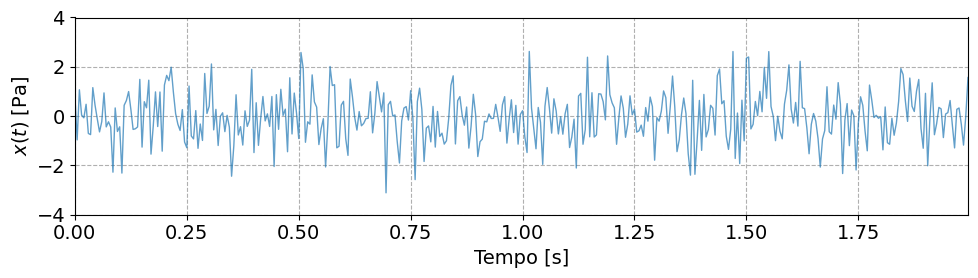

In [13]:
fs = 200
time = np.arange(0, 2, 1/fs)

# sinal aleatório completo
xt = np.random.normal(loc = 0, scale = 1, size = len(time))

# plot signal
plt.figure(figsize = (10, 3))
plt.plot(time, xt, linewidth = 1, alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$x(t)$ [Pa]')
plt.xlim((0, time[-1]))
plt.ylim((-4, 4))
plt.xlabel('Tempo [s]')
plt.tight_layout()

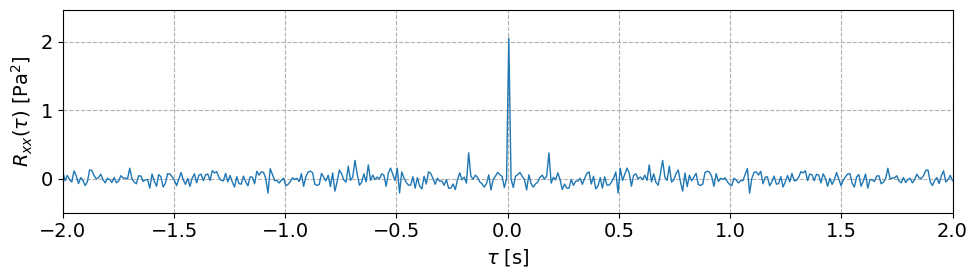

In [14]:
# Calculemos a auto-correlação
Rxx = np.correlate(xt, xt, mode = 'same')
tau= np.linspace(-len(Rxx)/fs, len(Rxx)/fs, len(Rxx))

# plot autocorrelação
plt.figure(figsize = (10, 3))
plt.plot(tau, Rxx/fs, linewidth = 1)
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$R_{xx}(\tau)$ [Pa$^2$]')
plt.xlim((tau[0], tau[-1]))
plt.ylim((-0.5, 1.2*max(np.abs(Rxx/fs))))
plt.xlabel(r'$\tau$ [s]')
plt.tight_layout()

# Exemplo 2 - Seno contaminado por ruído

Consideremos um sinal senoidal contaminado por ruído. Temos que

\begin{equation}
x(t) = s(t) + n(t),
\end{equation}
com

\begin{equation}
s(t) = A \mathrm{sin}(2\pi f t + \phi)
\end{equation}

e $n(t)$ um sinal aleatório com distribuição normal. A autocorrelação de $x(t)$ é dada por

\begin{equation}
E[x(t)x(t+\tau)] = E[(s(t) + n(t)) \ (s(t+\tau) + n(t+\tau))] \\
E[x(t)x(t+\tau)] = E[s(t) s(t+\tau) + s(t) n(t+\tau) +  n(t) s(t+\tau) + n(t) n(t+\tau)]
\end{equation}
e como os operadores de expectativas são lineares, temos

\begin{equation}
E[x(t)x(t+\tau)] = E[s(t) s(t+\tau)] + E[n(t) n(t+\tau)] + E[s(t) n(t+\tau)] +  E[n(t) s(t+\tau)] 
\end{equation}
em que os primeiros dois termos representam as auto-correlações da função senoidal e do ruído aleatório. Já os últimos dois termos representam correlações cruzadas entre $s(t)$ e $n(t)$, que devem tender a zero, já que os $s(t)$ e $n(t)$ não são correlacionados. Assim
\begin{equation}
R_{xx}(\tau) = R_{ss}(\tau) + R_{nn}(\tau)
\end{equation}

Note que $R_{nn}(\tau)$ é um sinal impulsivo como do exemplo anterior e que

\begin{equation}
R_{ss}(\tau) = \frac{A^2}{2}\mathrm{cos}(2\pi f \tau),
\end{equation}
uma função cossenoidal desprovida da informação de fase de $s(t)$.


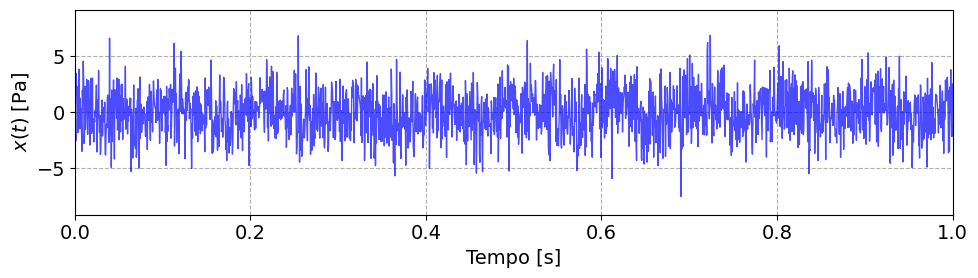

In [24]:
fs = 2000
time = np.arange(0, 20, 1/fs)

# sinal aleatório completo
st = 0.6*np.sin(2*np.pi*10*time + np.pi/6) #+ 0.3*np.sin(2*np.pi*20*time + np.pi/4)
nt = np.random.normal(loc = 0, scale = 2, size = len(time))
xt = st + nt

# plot signal
plt.figure(figsize = (10, 3))
plt.plot(time, xt, linewidth = 1, color = 'b', alpha = 0.7)
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$x(t)$ [Pa]')
plt.xlim((0, 1))
plt.xlabel('Tempo [s]')
plt.tight_layout()

In [14]:
.9**2/2

0.405

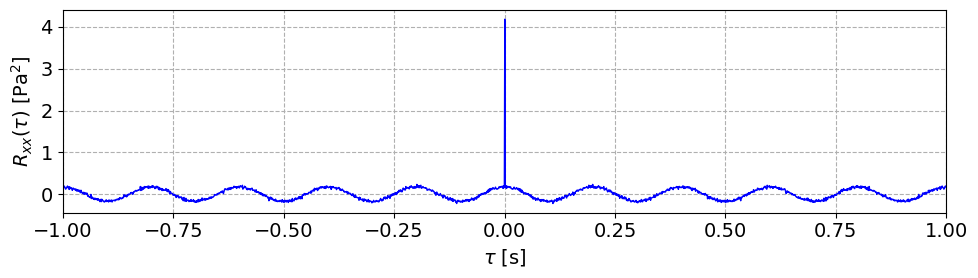

In [25]:
# Calculemos a auto-correlação
Rxx = np.correlate(xt, xt, mode = 'same')
tau = np.linspace(-len(Rxx)/fs, len(Rxx)/fs, len(Rxx))

# plot autocorrelação
plt.figure(figsize = (10, 3))
plt.plot(tau, Rxx/len(time), linewidth = 1, color = 'b')
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$R_{xx}(\tau)$ [Pa$^2$]')
plt.xlim((-1, 1))
#plt.ylim((-0.6, 0.6)) #1.2*max(np.abs(Rxx/fs))
plt.xlabel(r'$\tau$ [s]')
plt.tight_layout()

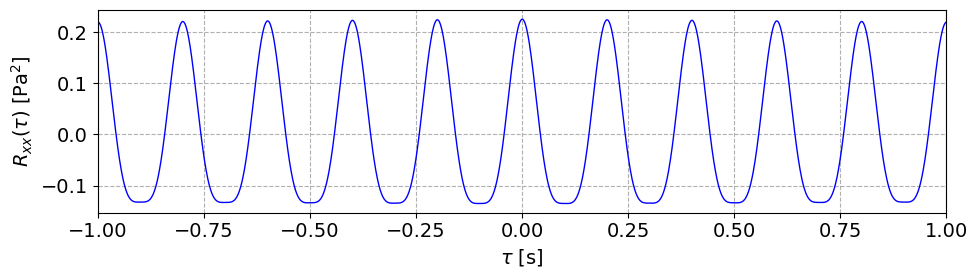

In [27]:
# Calculemos a auto-correlação
R = np.correlate(st, st, mode = 'same')
tau = np.linspace(-len(Rxx)/fs, len(Rxx)/fs, len(Rxx))

# plot autocorrelação
plt.figure(figsize = (10, 3))
plt.plot(tau, R/len(time), linewidth = 1, color = 'b')
plt.grid(linestyle = '--', which='both')
plt.ylabel(r'$R_{xx}(\tau)$ [Pa$^2$]')
plt.xlim((-1, 1))
#plt.ylim((-0.6, 0.6)) #1.2*max(np.abs(Rxx/fs))
plt.xlabel(r'$\tau$ [s]')
plt.tight_layout()